First tried to face the removal of noise in images with Autoencoders. In this code, we'll create a simple Autoencoder with Keras to take noise out the Mnist dataset. We'll add this noise to the dataset.

Import the libraries.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

Load Mnist dataset.

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(7000, 28, 28)
(3000, 28, 28)


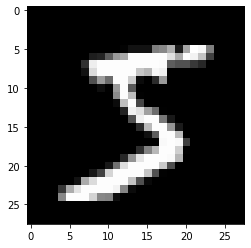

In [4]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

X_validation, X_test_small, Y_validation, Y_test_small = train_test_split(X_test, Y_test, test_size = 3000)

plt.imshow(X_train[0])
plt.gray()

print(X_train.shape)
print(X_validation.shape)
print(X_test_small.shape)

Preprocess Mnist images, normalization between 0 and 1 and reshaping. 

In [5]:
#normalization
X_train = X_train.astype('float32') / 255
X_validation = X_validation.astype('float32') / 255
X_test_small = X_test_small.astype('float32') / 255
#reshaping -> images, num of images, size, size, 1.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_validation = np.reshape(X_validation, (len(X_validation), 28, 28, 1))
X_test_small = np.reshape(X_test_small, (len(X_test_small), 28, 28, 1))

Adding noise to the images with a Gaussian distribution.

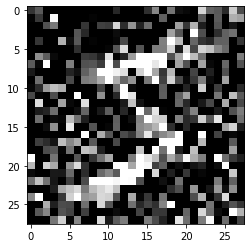

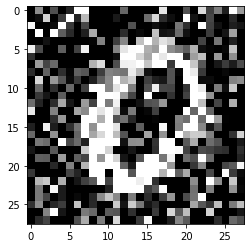

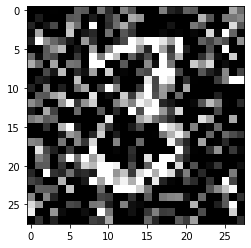

<Figure size 432x288 with 0 Axes>

In [6]:
''' np.random.normal generates an array with random values sampled from the gaussian
 distribution with the following params:
 - loc is the mean of the distribution.
 - scale is the standard deviation.
 - size is the size of the array.
'''
noise_factor = 0.5
#we choose loc = 0 and scale = 1. We add noise to the original images.
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_validation_noisy = X_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_validation.shape) 
X_test_small_noisy = X_test_small + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_small.shape) 

#limit the values between 0 and 1.
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_validation_noisy = np.clip(X_validation_noisy, 0., 1.)
X_test_small_noisy = np.clip(X_test_small_noisy, 0., 1.)


plt.imshow(X_train_noisy[0].reshape(28,28))
plt.show()
plt.imshow(X_validation_noisy[0].reshape(28,28))
plt.show()
plt.imshow(X_test_small_noisy[0].reshape(28,28))
plt.show()
plt.gray()


Then, we create the model of the Autoencoder.

In [18]:
#input layer
input = tf.keras.layers.Input(shape=(28, 28, 1))

#encoder
layer1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
layer2 = tf.keras.layers.MaxPool2D((2, 2), padding='same')(layer1)
layer3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(layer2)
encoder = tf.keras.layers.MaxPool2D((2, 2), padding='same')(layer3)

#decoder
layer4 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder)
layer5 = tf.keras.layers.UpSampling2D((2, 2))(layer4)
layer6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(layer5)
layer7 = tf.keras.layers.UpSampling2D((2, 2))(layer6)
decoder = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(layer7)

#sigmoid function to range the output between 0 and 1.

autoencoder = tf.keras.Model(input, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 32)        0   

Training.

In [20]:
model = autoencoder.fit(X_train_noisy, X_train, epochs=100, batch_size=128,
                  shuffle=True, validation_data=(X_validation_noisy, X_validation))

Epoch 1/100
469/469 [==============================] - 9s 17ms/step - loss: 0.2380 - accuracy: 0.8059 - val_loss: 0.1151 - val_accuracy: 0.8083
Epoch 2/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1137 - accuracy: 0.8111 - val_loss: 0.1075 - val_accuracy: 0.8104
Epoch 3/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1075 - accuracy: 0.8119 - val_loss: 0.1040 - val_accuracy: 0.8106
Epoch 4/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1041 - accuracy: 0.8127 - val_loss: 0.1017 - val_accuracy: 0.8113
Epoch 5/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1020 - accuracy: 0.8132 - val_loss: 0.1004 - val_accuracy: 0.8116
Epoch 6/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1007 - accuracy: 0.8130 - val_loss: 0.0995 - val_accuracy: 0.8117
Epoch 7/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0998 - accuracy: 0.8131 - val_loss: 0.0989 - val_accuracy:

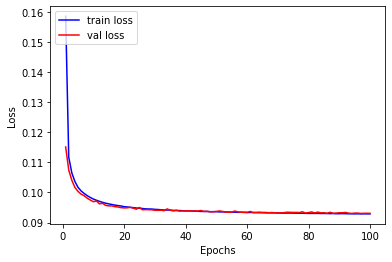

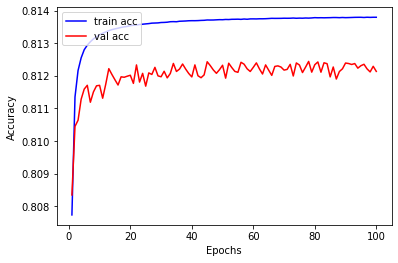

In [51]:
loss_train = model.history['loss']
accuracy_train = model.history['accuracy']
loss_val = model.history['val_loss']
accuracy_val = model.history['val_accuracy']

t = np.linspace(1, 100, 100)

plt.plot(t, loss_train, "-b", label="train loss")
plt.plot(t, loss_val, "-r", label="val loss")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(t, accuracy_train, "-b", label="train acc")
plt.plot(t, accuracy_val, "-r", label="val acc")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Evaluating the model.

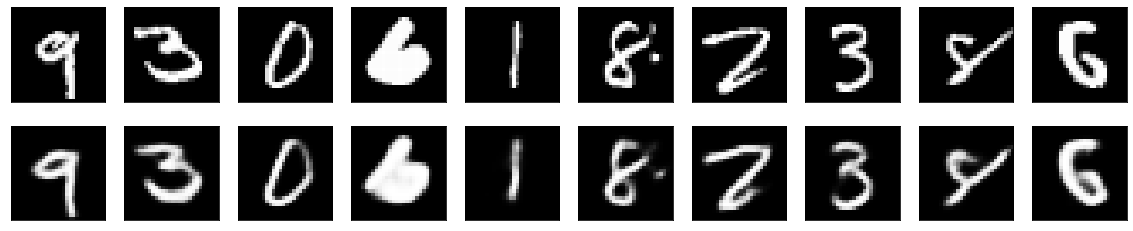

In [29]:
#predictions
pred = autoencoder.predict(X_test_small_noisy)

#visualizating the predictions
samples = 10
plt.figure(figsize=(20, 4))

for i in range(1, samples + 1):
  #original image
  ax = plt.subplot(2, samples, i)
  plt.imshow(X_test_small[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(2, samples, i + samples)
  plt.imshow(pred[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

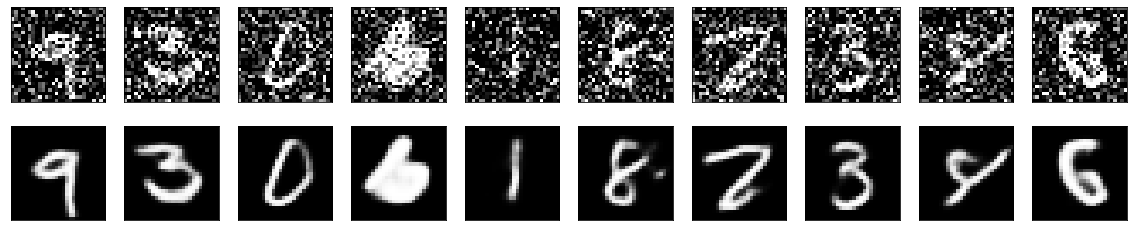

In [30]:
samples = 10
plt.figure(figsize=(20, 4))
for i in range(1, samples + 1):
  #original image
  ax = plt.subplot(2, samples, i)
  plt.imshow(X_test_small_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(2, samples, i + samples)
  plt.imshow(pred[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

To sum up, we can see how this model is capable of removing the noise and leave the image even better than the original. Obviously, this problem is like "hello world" in programming. So, despite the fact that the results are really good, we should keep going with trickier datasets.